In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
from keras.constraints import maxnorm
from keras import optimizers

Using Theano backend.


In [2]:
# Function to create model, required for KerasClassifier
def create_model1(neurons=9):
    model1 = Sequential()
    model1.add(Dense(neurons, input_dim=9, activation='relu'))
    model1.add(Dense(2, activation='softmax'))
    adm = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model1.compile(loss='categorical_crossentropy', optimizer=adm, metrics=['accuracy'])
    return model1

In [3]:
seed=42

In [4]:
np.random.seed(seed)

In [5]:
import pandas as pd
df = pd.read_csv("wbc.csv")

In [6]:
df=df.replace('?',np.nan)
df['bare_nuclei'] = pd.to_numeric(df.bare_nuclei.fillna(df.bare_nuclei.median()))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
clump_thickness       699 non-null int64
cell_size             699 non-null int64
cell_shape            699 non-null int64
marginal_adhesion     699 non-null int64
epitelial_cellsize    699 non-null int64
bare_nuclei           699 non-null float64
bland_chromatin       699 non-null int64
normal_nucleoli       699 non-null int64
mitoses               699 non-null int64
jenis                 699 non-null int64
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [7]:
X = df.drop([df.columns[-1]], axis=1)
y = df.jenis.map({2: 0, 4: 1})

In [8]:
print (type(X))
print (type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

In [10]:
y_train = np_utils.to_categorical(y_train)

In [11]:
y_test = np_utils.to_categorical(y_test)
#y_test.shape

In [12]:
print (type(y_train))
print (type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [13]:
y_train

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,

In [14]:
print (type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [15]:
model = KerasClassifier(build_fn=create_model1, class_weight=None, verbose=0)

In [16]:
neurons = [9,18,27,36,45]
epochs = [10, 20, 50, 100, 200, 500]

In [17]:
param_grid = dict(neurons=neurons)

In [80]:
param_grid2 = dict(neurons=neurons, epochs=epochs)

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
def cost_breast_cancer(y_true, y_pred):
    CM = confusion_matrix(y_true, y_pred)
    FN = CM[1][0]
    FP = CM[0][1]
    costBC=((228.35*FP)+(2850000*FN))
    return costBC

In [20]:
def specificity(y_true, y_pred):
    CM = confusion_matrix(y_true, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    nilai=(TN/(FP+TN))
    return nilai

In [21]:
from sklearn.metrics import make_scorer
my_custom_scorer=make_scorer(cost_breast_cancer, greater_is_better=False)
score_specificity=make_scorer(specificity, greater_is_better=True)

In [22]:
from sklearn.model_selection import GridSearchCV

In [25]:
print(__doc__)


scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, 
                       scoring='accuracy')
    clf.fit(X_train.as_matrix(), np.argmax(y_train,1))

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    


Automatically created module for IPython interactive environment
# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'neurons': 36}

Grid scores on development set:

0.947 (+/-0.059) for {'neurons': 9}
0.949 (+/-0.059) for {'neurons': 18}
0.953 (+/-0.063) for {'neurons': 27}
0.962 (+/-0.063) for {'neurons': 36}
0.955 (+/-0.065) for {'neurons': 45}



In [60]:
print (type(clf.grid_scores_))

<class 'list'>


c:\users\annisa\anaconda3\envs\py35\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [46]:
grid_scores = clf.grid_scores_

c:\users\annisa\anaconda3\envs\py35\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [56]:
neurons2=np.array(neurons)

In [47]:
to_vary = neurons2

In [48]:
from sklearn_evaluation import plot

In [54]:
means.shape

(5,)

In [77]:
means2= np.array([ 0.95940171,  0.96794872,  0.96153846,  0.96367521,  0.96367521,
        0.96367521,  0.95512821,  0.94871795,  0.96581197,  0.96153846,
        0.95512821,  0.95726496,  0.96581197,  0.95726496,  0.95726496,
        0.95299145,  0.95299145,  0.9508547 ,  0.95726496,  0.94017094,
        0.94871795,  0.9465812 ,  0.95940171,  0.9508547 ,  0.96153846,
        0.9465812 ,  0.94871795,  0.94230769,  0.9465812 ,  0.94230769])

In [81]:
print(__doc__)


scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(estimator=model, param_grid=param_grid2, cv=10, 
                       scoring='accuracy')
    clf.fit(X_train.as_matrix(), np.argmax(y_train,1))

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    


Automatically created module for IPython interactive environment
# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'neurons': 27, 'epochs': 10}

Grid scores on development set:

0.942 (+/-0.070) for {'neurons': 9, 'epochs': 10}
0.947 (+/-0.073) for {'neurons': 18, 'epochs': 10}
0.959 (+/-0.070) for {'neurons': 27, 'epochs': 10}
0.951 (+/-0.079) for {'neurons': 36, 'epochs': 10}
0.955 (+/-0.049) for {'neurons': 45, 'epochs': 10}
0.955 (+/-0.068) for {'neurons': 9, 'epochs': 20}
0.959 (+/-0.065) for {'neurons': 18, 'epochs': 20}
0.957 (+/-0.067) for {'neurons': 27, 'epochs': 20}
0.953 (+/-0.076) for {'neurons': 36, 'epochs': 20}
0.936 (+/-0.088) for {'neurons': 45, 'epochs': 20}
0.957 (+/-0.077) for {'neurons': 9, 'epochs': 50}
0.957 (+/-0.051) for {'neurons': 18, 'epochs': 50}
0.953 (+/-0.066) for {'neurons': 27, 'epochs': 50}
0.957 (+/-0.057) for {'neurons': 36, 'epochs': 50}
0.955 (+/-0.059) for {'neurons': 45, 'epochs': 50}
0.957 (+/-0.038) for {

In [88]:
scores = np.array(means).reshape(len(epochs), len(neurons))

In [97]:
for i, value in enumerate(epochs):
    plt.plot(neurons, scores[i], marker='o', label='epochs: ' + str(value))
plt.legend()
plt.xlabel('neurons')
plt.ylabel('Accuracy')
plt.savefig('bismillah')

In [98]:
neuronsL = [9,18,27,36,45,54,63,72,81]
param_gridL = dict(neurons=neuronsL)

In [99]:
print(__doc__)


scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(estimator=model, param_grid=param_gridL, cv=10, 
                       scoring='accuracy')
    clf.fit(X_train.as_matrix(), np.argmax(y_train,1))

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    


Automatically created module for IPython interactive environment
# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'neurons': 18}

Grid scores on development set:

0.947 (+/-0.064) for {'neurons': 9}
0.962 (+/-0.066) for {'neurons': 18}
0.951 (+/-0.082) for {'neurons': 27}
0.949 (+/-0.075) for {'neurons': 36}
0.955 (+/-0.068) for {'neurons': 45}
0.951 (+/-0.081) for {'neurons': 54}
0.953 (+/-0.066) for {'neurons': 63}
0.955 (+/-0.068) for {'neurons': 72}
0.949 (+/-0.061) for {'neurons': 81}



In [102]:
means

array([ 0.9465812 ,  0.96153846,  0.9508547 ,  0.94871795,  0.95512821,
        0.9508547 ,  0.95299145,  0.95512821,  0.94871795])

In [103]:
meansL=means

c:\users\annisa\anaconda3\envs\py35\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


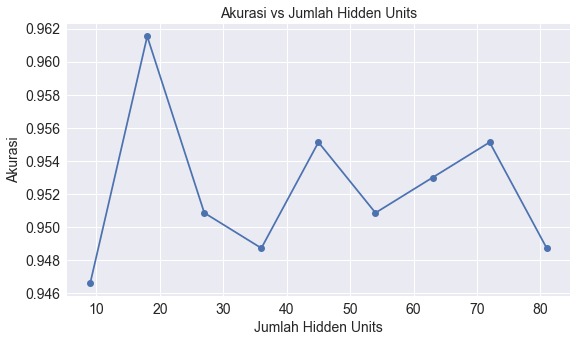

In [109]:
figure = plt.figure(figsize=(9,5))
plt.plot(neuronsL, meansL, marker='o')
plt.title("Akurasi vs Jumlah Hidden Units",fontsize=14)
plt.xlabel('Jumlah Hidden Units',fontsize=14)
plt.ylabel('Akurasi',fontsize=14)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.legend(prop={'size':14})
plt.show()

In [110]:
print(__doc__)


scores = ['recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf2 = GridSearchCV(estimator=model, param_grid=param_gridL, cv=10, 
                       scoring='accuracy')
    clf2.fit(X_train.as_matrix(), np.argmax(y_train,1))

    print("Best parameters set found on development set:")
    print()
    print(clf2.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means2 = clf2.cv_results_['mean_test_score']
    stds2 = clf2.cv_results_['std_test_score']
    for mean, std, params in zip(means2, stds2, clf2.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'neurons': 45}

Grid scores on development set:

0.908 (+/-0.182) for {'neurons': 9}
0.949 (+/-0.070) for {'neurons': 18}
0.949 (+/-0.061) for {'neurons': 27}
0.944 (+/-0.058) for {'neurons': 36}
0.962 (+/-0.074) for {'neurons': 45}
0.949 (+/-0.058) for {'neurons': 54}
0.951 (+/-0.082) for {'neurons': 63}
0.957 (+/-0.051) for {'neurons': 72}
0.957 (+/-0.072) for {'neurons': 81}



c:\users\annisa\anaconda3\envs\py35\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


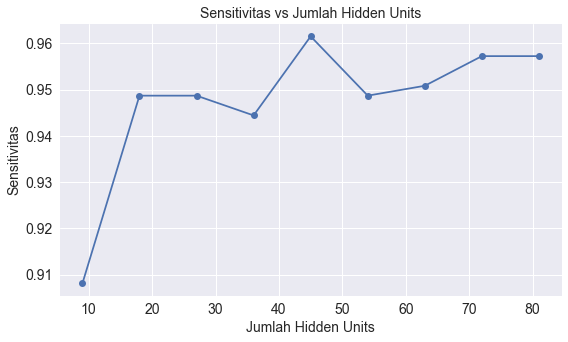

In [113]:
figure = plt.figure(figsize=(9,5))
plt.plot(neuronsL, means2, marker='o')
plt.title("Sensitivitas vs Jumlah Hidden Units",fontsize=14)
plt.xlabel('Jumlah Hidden Units',fontsize=14)
plt.ylabel('Sensitivitas',fontsize=14)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.legend(prop={'size':14})
plt.show()

In [27]:
clf.best_score_

0.96794871794871795

In [29]:
means

array([ 0.95940171,  0.96794872,  0.96153846,  0.96367521,  0.96367521,
        0.96367521,  0.95512821,  0.94871795,  0.96581197,  0.96153846,
        0.95512821,  0.95726496,  0.96581197,  0.95726496,  0.95726496,
        0.95299145,  0.95299145,  0.9508547 ,  0.95726496,  0.94017094,
        0.94871795,  0.9465812 ,  0.95940171,  0.9508547 ,  0.96153846,
        0.9465812 ,  0.94871795,  0.94230769,  0.9465812 ,  0.94230769])

In [ ]:
import matplotlib.pyplot as plt
from sklearn_evaluation.plot import grid_search


clf = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, 
                       scoring='accuracy')
clf.fit(X_train.as_matrix(), np.argmax(y_train,1))

grid_scores = clf.grid_scores_

# changing numeric parameter without any restrictions
# in the rest of the parameter set
to_vary = 'n_estimators'
grid_search(clf.grid_scores_, to_vary)
plt.show()

In [17]:
scores1=cross_val_score(model, X_train.as_matrix(), np.argmax(y_train,1), cv=10)

In [18]:
print("Accuracy: %0.4f (+/- %0.4f)" % (scores1.mean(), scores1.std() * 2))

Accuracy: 0.9466 (+/- 0.0920)


In [19]:
def create_model2():
    model2 = Sequential()
    model2.add(Dense(18, input_dim=9, activation='relu'))
    model2.add(Dense(2, activation='softmax'))
    adm = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model2.compile(loss='categorical_crossentropy', optimizer=adm, metrics=['accuracy'])
    return model2

In [20]:
model2 = KerasClassifier(build_fn=create_model2, epochs=500, batch_size=100, class_weight=None, verbose=0)

In [21]:
scores2=cross_val_score(model2, X_train.as_matrix(), np.argmax(y_train,1), cv=10)

In [22]:
print("Accuracy: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std() * 2))

Accuracy: 0.9423 (+/- 0.0832)


In [23]:
def create_model3():
    model3 = Sequential()
    model3.add(Dense(27, input_dim=9, activation='relu'))
    model3.add(Dense(2, activation='softmax'))
    adm = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model3.compile(loss='categorical_crossentropy', optimizer=adm, metrics=['accuracy'])
    return model3

In [24]:
model3 = KerasClassifier(build_fn=create_model3, epochs=500, batch_size=100, class_weight=None, verbose=0)

In [25]:
scores3=cross_val_score(model3, X_train.as_matrix(), np.argmax(y_train,1), cv=10)

In [26]:
print("Accuracy: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std() * 2))

Accuracy: 0.9466 (+/- 0.0547)


In [27]:
def create_model4():
    model4 = Sequential()
    model4.add(Dense(36, input_dim=9, activation='relu'))
    model4.add(Dense(2, activation='softmax'))
    adm = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model4.compile(loss='categorical_crossentropy', optimizer=adm, metrics=['accuracy'])
    return model4

In [28]:
model4 = KerasClassifier(build_fn=create_model4, epochs=500, batch_size=100, class_weight=None, verbose=0)

In [29]:
scores4=cross_val_score(model4, X_train.as_matrix(), np.argmax(y_train,1), cv=10)

In [30]:
print("Accuracy: %0.4f (+/- %0.4f)" % (scores4.mean(), scores4.std() * 2))

Accuracy: 0.9509 (+/- 0.0633)


In [31]:
def create_model5():
    model5 = Sequential()
    model5.add(Dense(45, input_dim=9, activation='relu'))
    model5.add(Dense(2, activation='softmax'))
    adm = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model5.compile(loss='categorical_crossentropy', optimizer=adm, metrics=['accuracy'])
    return model5

In [32]:
model5 = KerasClassifier(build_fn=create_model5, epochs=500, batch_size=100, class_weight=None, verbose=0)

In [33]:
scores5=cross_val_score(model5, X_train.as_matrix(), np.argmax(y_train,1), cv=10)

In [34]:
print("Accuracy: %0.4f (+/- %0.4f)" % (scores5.mean(), scores5.std() * 2))

Accuracy: 0.9551 (+/- 0.0586)
